# Linear regression

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

In [71]:
data = pd.read_csv('ex1data1.txt', names=['population', 'profit'])
print data.shape
print data.head()

(97, 2)
   population   profit
0      6.1101  17.5920
1      5.5277   9.1302
2      8.5186  13.6620
3      7.0032  11.8540
4      5.8598   6.8233


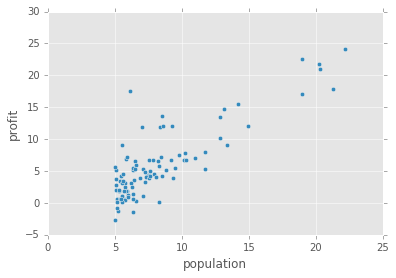

In [72]:
data.plot(kind='scatter',x='population',y='profit')

In [75]:
# percept term
c = np.ones(len(data.population))
# features
X = np.stack((c,data.population.values), axis=1)
y = data.profit.values
print X[0], y[0]

[ 1.      6.1101] 17.592


In [86]:
## Algorithm

In [76]:
def compute_cost(X, y, theta):
    J = 0.0
    for i in range(len(X)):
        prediction = np.dot(X[i],theta)
        J += (prediction - y[i])**2
    J = J/(2*len(X))
    return J

theta = np.zeros(2)
compute_cost(X, y, theta)

32.072733877455654

In [77]:
def gradient_descent(X, y, theta, alpha, num_iters):
    J_history = []
    for i in range(num_iters):
        prediction = np.dot(X,theta)
        theta -= (alpha/len(X)) * np.dot((prediction - y), X)
        J_history.append(compute_cost(X,y,theta))
#         print theta, J_history
    return theta, J_history

theta = np.zeros(2)
iterations = 1500
alpha = 0.01
theta, J_history = gradient_descent(X, y, theta, alpha, iterations)
print theta

[-3.63029144  1.16636235]


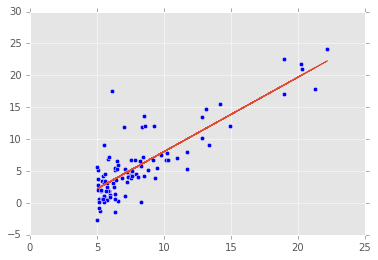

In [78]:
predictions = np.dot(X,theta)
plt.scatter(X[:,1], y)
plt.plot(X[:,1], predictions)

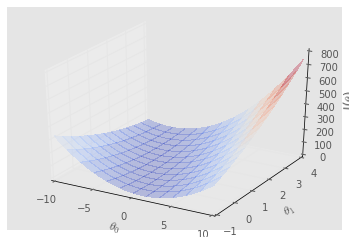

In [85]:
from matplotlib import cm
from mpl_toolkits.mplot3d import axes3d
# Grid over which we will calculate J
theta0_vals = np.linspace(-10, 10, X.shape[0])
theta1_vals = np.linspace(-1, 4, X.shape[0])

# initialize J_vals to a matrix of 0's
J_vals=np.array(np.zeros(X.shape[0]).T)

for i in range(theta0_vals.size):
    col = []
    for j in range(theta1_vals.size):
        t = np.array([theta0_vals[i],theta1_vals[j]])
        col.append(compute_cost(X, y, t.T))
    J_vals=np.column_stack((J_vals,col))

# Because of the way meshgrids work in the surf command, we need to
# transpose J_vals before calling surf, or else the axes will be flipped
J_vals = J_vals[:,1:].T
theta0_vals, theta1_vals = np.meshgrid(theta0_vals, theta1_vals)

# Surface plot
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(theta0_vals, theta1_vals, J_vals, rstride=8, cstride=8, alpha=0.3,
                cmap=cm.coolwarm, linewidth=0, antialiased=False)
ax.set_xlabel(r'$\theta_0$')
ax.set_ylabel(r'$\theta_1$')
ax.set_zlabel(r'J($\theta$)')